In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [55]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [57]:
df = df.drop(['Car_Name'], axis=1)

In [58]:
label_encoders = {}
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [59]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [60]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Architecture 1

In [63]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
Dense(64, activation='relu'),
BatchNormalization(),
model.add(Dense(1))
custom_optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 37.8597 - mae: 3.9763 - val_loss: 33.7329 - val_mae: 4.1812
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.3508 - mae: 3.4356 - val_loss: 19.8846 - val_mae: 3.1253
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.2508 - mae: 2.7849 - val_loss: 7.5671 - val_mae: 1.9257
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.4215 - mae: 2.0527 - val_loss: 3.3408 - val_mae: 1.3957
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.8024 - mae: 2.0691 - val_loss: 3.1064 - val_mae: 1.3240
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0285 - mae: 1.5909 - val_loss: 2.6949 - val_mae: 1.2270
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.3611 - mae: 1.2278 - val_loss: 2.8072 - val_mae: 1.2257
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.2792 - mae: 1.0299 - val_loss: 2.7024 - val_mae: 1.1836
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.1870 -

In [65]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [66]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8082 - mae: 0.6149
Test MAE: 0.62
R2 Score: 0.9649283202186933


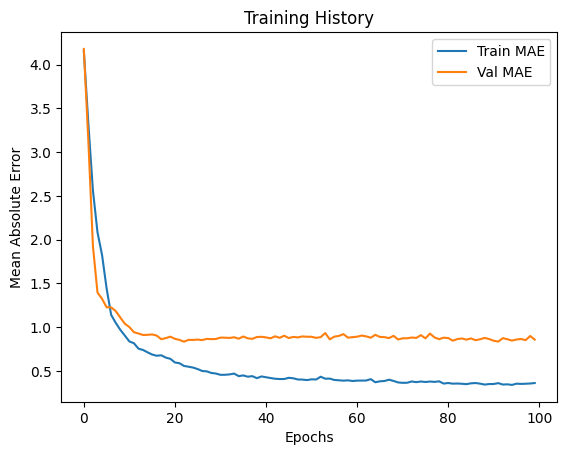

In [67]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

Architecture 2

In [68]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
custom_optimizer = Adam(learning_rate=0.01)
model2.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 128 (512.00 B)

In [69]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 45.1649 - mae: 4.3314 - val_loss: 41.6402 - val_mae: 4.8583
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 22.1335 - mae: 2.8652 - val_loss: 29.4472 - val_mae: 4.1159
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.1050 - mae: 1.3777 - val_loss: 17.4218 - val_mae: 3.2230
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.2208 - mae: 1.4765 - val_loss: 19.5816 - val_mae: 3.4463
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.5111 - mae: 1.2767 - val_loss: 26.2704 - val_mae: 3.8942
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.2881 - mae: 0.9533 - val_loss: 26.9145 - val_mae: 3.9103
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8275 - mae: 1.0239 - val_loss: 21.5346 - val_mae: 3.5634
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.0418 - mae: 0.9177 - val_loss: 17.8284 - val_mae: 3.2784
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.1534 - mae

In [70]:
y_pred = model2.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [71]:
loss, mae = model2.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.1843 - mae: 1.0845
Test MAE: 1.09
R2 Score: 0.9078549211431016


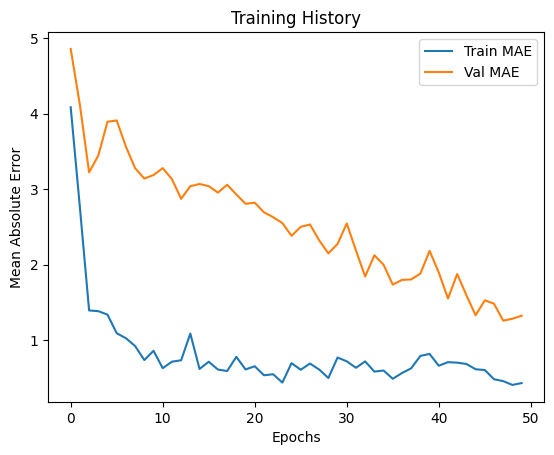

In [72]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [73]:
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1)
])
custom_optimizer = Adam(learning_rate=0.05)
model3.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 128 (512.00 B)

In [74]:
history = model3.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 41.0406 - mae: 4.6936 - val_loss: 19.8133 - val_mae: 3.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 15.0197 - mae: 3.1128 - val_loss: 3.9850 - val_mae: 1.6286
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.4394 - mae: 1.6078 - val_loss: 38.6364 - val_mae: 4.5800
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.0511 - mae: 1.2409 - val_loss: 93.0486 - val_mae: 6.9503
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.2829 - mae: 1.6192 - val_loss: 52.9106 - val_mae: 5.0317
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7068 - mae: 1.1653 - val_loss: 29.5274 - val_mae: 3.6847
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.4094 - mae: 1.2369 - val_loss: 38.4012 - val_mae: 4.4756
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.6773 - mae: 1.2215 - val_loss: 93.7434 - val_mae: 7.0289
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.60

In [75]:
y_pred = model3.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [76]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8082 - mae: 0.6149
Test MAE: 0.62
R2 Score: 0.9469683885836717


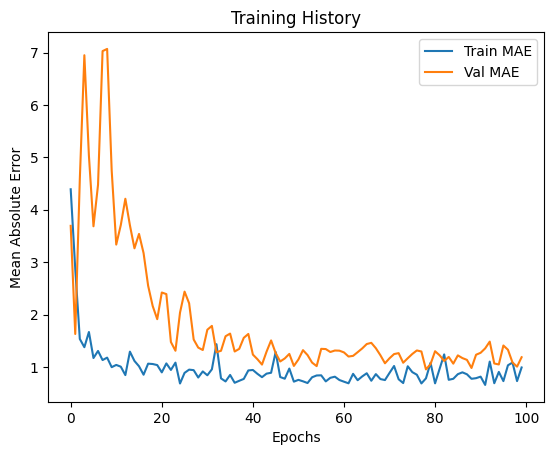

In [77]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [78]:
model4 = Sequential([
    Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1)
])
custom_optimizer = Adam(learning_rate=0.0001)
model4.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
history = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 39.1111 - mae: 3.7401 - val_loss: 46.6172 - val_mae: 5.1298
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 45.2617 - mae: 3.9895 - val_loss: 46.0311 - val_mae: 5.1057
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 34.0882 - mae: 3.5499 - val_loss: 45.4091 - val_mae: 5.0785
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 39.0773 - mae: 3.6725 - val_loss: 44.7744 - val_mae: 5.0496
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31.7045 - mae: 3.3225 - val_loss: 44.1456 - val_mae: 5.0195
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 28.0871 - mae: 3.4038 - val_loss: 43.5016 - val_mae: 4.9877
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.9537 - mae: 3.0718 - val_loss: 42.8567 - val_mae: 4.9541
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 26.5437 - mae: 3.0174 - val_loss: 42.1758 - val_mae: 4.9182
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss

In [80]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [81]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8082 - mae: 0.6149
Test MAE: 0.62
R2 Score: 0.9649283202186933


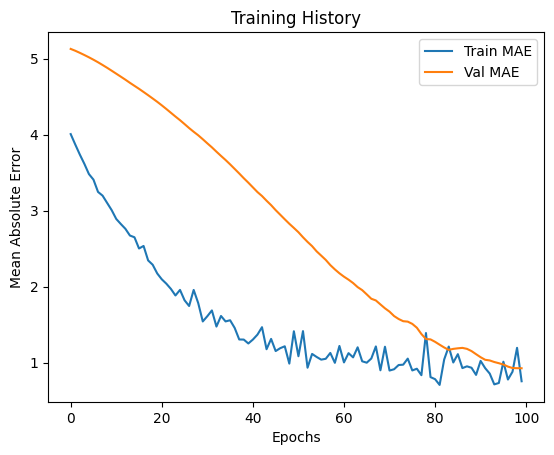

In [82]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()